<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/StepikData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sub_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
sub_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [ ]:
sub_data['date'] = pd.to_datetime(sub_data['timestamp'], unit='s')
sub_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [ ]:
sub_data['day'] = sub_data['date'].dt.date
sub_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
pvt_data = sub_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()
pvt_data.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
events = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [ ]:
events['date'] = pd.to_datetime(events['timestamp'], unit='s')
events['day'] = events['date'].dt.date

In [ ]:
# user id and days he was online
events[['user_id', 'day', 'date']].drop_duplicates(subset=['user_id', 'day'])\
  .groupby('user_id')['date'].apply(list).head()

user_id
1                                [2016-09-02 14:44:24]
2           [2017-12-27 14:02:44, 2018-02-21 15:29:26]
3    [2015-06-15 08:54:36, 2015-09-03 05:22:05, 201...
5           [2016-06-17 09:46:49, 2017-07-12 11:40:21]
7                                [2018-03-21 12:17:40]
Name: date, dtype: object

In [ ]:
# gap_duration betwen online
gap = events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
  .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

gap

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [ ]:
# diff in days
gap = pd.Series(np.concatenate(gap, axis=0))
gap = gap / (24 * 60 * 60)

<Axes: >

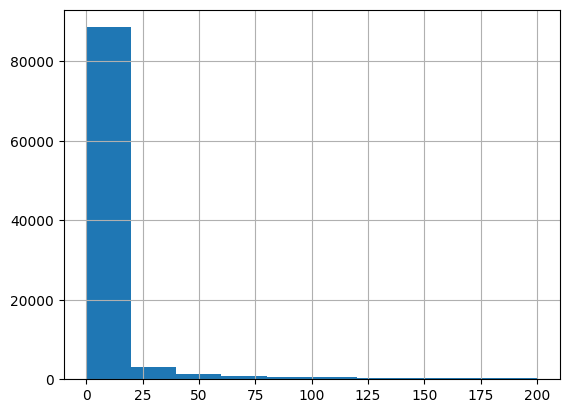

In [ ]:
gap[gap < 200].hist()

In [ ]:
sub_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
sub_data[sub_data['submission_status']== 'correct'].groupby('user_id')\
  .agg({'submission_status': 'count'})\
  .sort_values('submission_status', ascending=False)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1


In [ ]:
gap.quantile(0.90) / (24 * 60 * 60)

0.00021210642789780559

In [ ]:
events.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [89]:
user_data = events.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={
    'timestamp': 'last_timestamp'
})

In [90]:
now = 1526772685
trashold = 30 * 24 * 60 * 60  # 30 days in seconds

In [91]:
# now is 2018-05-19 23:31:25 (as this data is kinda old and we can't use datetime.now() here)
user_data['left'] = (now - (user_data.last_timestamp)) > trashold

In [92]:
user_data.head(30)

,user_id,last_timestamp,left
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
5,8,1481466913,True
6,9,1484999497,True
7,11,1526140625,False
8,14,1436368676,True
9,16,1513162585,True


In [34]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')
events_data['day'] = events_data['date'].dt.date


In [37]:
events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False).aggregate({'step_id': 'count'})\
  .rename(columns = {'step_id': 'steps_passed'}).reset_index()

,index,user_id,steps_passed
0,0,2,9
1,1,3,87
2,2,5,11
3,3,7,1
4,4,8,84
...,...,...,...
17257,17257,26789,2
17258,17258,26790,8
17259,17259,26794,69
17260,17260,26797,10


In [96]:
user_events_data = events_data.pivot_table(index='user_id',
                                           columns='action',
                                           values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()

In [97]:
user_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [83]:
# easy way to merge two dataframes
user_data = user_data.merge(pvt_data, how='outer').head()
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,left,correct,wrong,index,steps_passed,discovered,passed,started_attempt,viewed,day,unique_days,passed_course
0,1,1.472827e+09,True,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,False
1,2,1.519227e+09,True,2.0,0.0,0.0,9.0,9.0,9.0,2.0,10.0,2.0,2.0,False
2,3,1.444582e+09,True,29.0,23.0,1.0,87.0,91.0,87.0,30.0,192.0,7.0,7.0,False
3,5,1.499860e+09,True,2.0,2.0,2.0,11.0,11.0,11.0,4.0,12.0,2.0,2.0,False
4,7,1.521635e+09,True,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,False


In [85]:
users_days = events_data.groupby('user_id').day.nunique()
users_days = users_days.to_frame().reset_index()
users_days = users_days.rename(columns={'day': 'unique_days'})
users_days.head()

,user_id,unique_days
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [98]:
user_data = user_data.merge(user_events_data, how='outer')
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,left,discovered,passed,started_attempt,viewed
0,1,1472827464,True,1,0,0,1
1,2,1519226966,True,9,9,2,10
2,3,1444581588,True,91,87,30,192
3,5,1499859939,True,11,11,4,12
4,7,1521634660,True,1,1,0,1


In [99]:
user_data = user_data.merge(users_days, how='outer')
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,left,discovered,passed,started_attempt,viewed,unique_days
0,1,1472827464,True,1,0,0,1,1
1,2,1519226966,True,9,9,2,10,2
2,3,1444581588,True,91,87,30,192,7
3,5,1499859939,True,11,11,4,12,2
4,7,1521634660,True,1,1,0,1,1


In [100]:
user_data.user_id.nunique() == events_data.user_id.nunique()

True

In [101]:
user_data.passed.mean()

33.81153166268067

In [103]:
user_data['passed_course'] = user_data.passed > 170

In [104]:
user_data.head()

,user_id,last_timestamp,left,discovered,passed,started_attempt,viewed,unique_days,passed_course
0,1,1472827464,True,1,0,0,1,1,False
1,2,1519226966,True,9,9,2,10,2,False
2,3,1444581588,True,91,87,30,192,7,False
3,5,1499859939,True,11,11,4,12,2,False
4,7,1521634660,True,1,1,0,1,1,False


In [105]:
user_data.query('passed_course==True')

,user_id,last_timestamp,left,discovered,passed,started_attempt,viewed,unique_days,passed_course
9,16,1513162585,True,196,196,108,651,21,True
13,22,1507142631,True,198,198,89,492,32,True
18,30,1510574287,True,198,198,150,512,42,True
22,34,1525626844,False,198,195,92,1013,60,True
26,39,1502712399,True,198,198,88,1160,170,True
...,...,...,...,...,...,...,...,...,...
19190,26740,1463224362,True,193,188,96,670,18,True
19207,26763,1436216740,True,193,193,93,391,12,True
19218,26777,1436605200,True,193,191,120,422,15,True
19220,26779,1520157100,True,196,196,111,379,38,True


In [106]:
user_data.groupby('passed_course').count()

,user_id,last_timestamp,left,discovered,passed,started_attempt,viewed,unique_days
passed_course,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425


In [109]:
user_data['passed_course'].value_counts(normalize=True)*100

False    92.591245
True      7.408755
Name: passed_course, dtype: float64